# Deep Reinforcement Learning

-------------------------

References:
* Reinforcement Learning: An Introduction - [Book Draft](http://incompleteideas.net/book/bookdraft2018jan1.pdf) | [O'Reilly Code](https://www.oreilly.com/radar/introduction-to-reinforcement-learning-and-openai-gym/)
* CS8321 - [Reinforcement Learning Notebook](https://github.com/8000net/LectureNotesMaster/blob/master/08%20LectureReinforcementLearning.ipynb)
* CoderOne - [RL Tutorial with OpenAi gym](https://www.gocoder.one/blog/rl-tutorial-with-openai-gym/)

In [1]:
%matplotlib inline
from JSAnimation.IPython_display import display_animation
from matplotlib import animation
import matplotlib.pyplot as plt
from IPython.display import display

## States and Actions

![alt text](./images/states_actions.png)

The first core concept we will cover is the understanding of what states and actions are. Reinforcement learning is a type of machine learning that is agent-oriented; it relies on its enviroment rather than a teacher to achieve its desired goal. This is similar to how humans learn, through the steps of trial and error.

Let's take for example a person learning to navigate a maze. A state can compropise of any crossroad they are met with, an action is defined as a choice/direction they choose to go, and the goal (reward) is defined as them reaching the end of the maze.

As the person navigates the maze, they will naturally discover that some paths are less optimal than others, while some do not ever reach the end. Ideally, over time, they would be able to navigate the most optimal path every time. And this is what we are trying to achieve.

## Markov Decision Process 

Building on top of states and actions is the next step, a Markov Decision Process (MDP). A MDP can be simplified to a tuple containing 5 parts:
   
S - set of states   
A - set of actions   
P - probability that an action *a* at state *s* at time *t* will get to state *s + 1* at time *t + 1*   
R - reward received after moving from state *s* to state *s + 1*   
$\gamma$ - discount factor that can optimize future rewards vs present rewards
   
Each of these play a role in determining a final "policy" $\pi$; a rule that says given a state *s*, action *a* will be taken.

![alt text](./images/markov.png)

This is the standard relationship between an Agent and the Enviroment in a MDP. An agent is the one who learns and makes decision while the enviroment is everything outside of the agent. These two variables constantly interact and feed each other data, with the enviroment supplying the agent with rewards and the agent triggering the effects of the enviroment.

## Q-Learning

This brings us to building our first algorithm, Q-Learning. Given a state s, and an action a, the Q function returns an estimate of the total reward starting from s and taking a.

Let's go over the formula:   
 
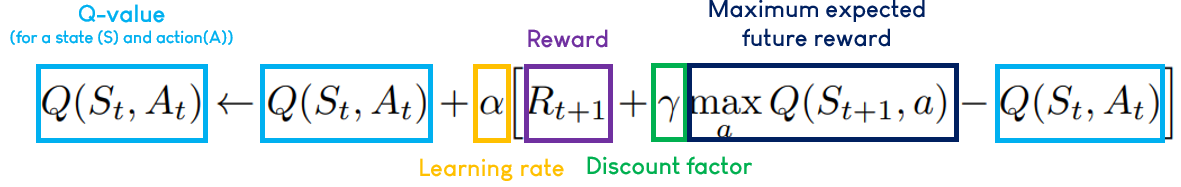
   
$\alpha$ - the learning rate, typically a small value between 0 and 1, indicates how much we update over values every time we take an action. Typically this value tends to be smaller in order not to overrepresent certain action. However it can also be 1, so that the $Q(s_t, a_t)$ terms cancel out (this is done in DQN).
    
$\gamma$ - discount factor, encourages an agent to seek a reward sooner than later, typically set between .9 and .99. This makes agents receive a smaller reward in the present to give better incentive for future rewards. The effect of the discount factor can be seen when the Bellman equation is expanded, and $\alpha = 1$.

$$Q({s_t, a_t}) = r_0 + \gamma r_1 + \gamma^2 r_2 + \gamma^3 r_ 3 ... $$
$$Q({s_t, a_t}) = r_0 + \gamma(r_1 + \gamma^2 r_2 + \gamma^3 r_ 3 ...) = r_0 + \gamma\max_a Q(s_{t+1}, a )$$

<img src="./images/q.png" width="400">

Given this formula, you need the apply it using the following steps:
1. Set initial value of *Q(s, a)* to all arbitrary values.   
2. Eventually while reaching the limit, make sure to do all actions *a* for all states *s*.
3. At each time *t*, change one element.
4. You could reduce the $\alpha$ element over time for optimization purposes.   

In order to better visualize this process, we will be going through a sample example based on a program running in OpenAI, something that will be helpful in your exploration of the topic. We will go into more detail on it after this.

### Example
First, we create the enviroment. In this case, it is Taxi-v3, an enviroment with the following rules:

There are 4 locations (labeled by different letters) and your job is to pick up the passenger at one location and drop him off in another. 
You receive +20 points for a successful dropoff.
Lose 1 point for every timestep it takes. 
10 point penalty for illegal pick-up and drop-off actions.

In [2]:
import gymnasium as gym
import tqdm
import random
import numpy as np
from time import sleep
from tqdm.notebook import tqdm

env = gym.make("Taxi-v3", render_mode='ansi')

In [3]:
# In order to start enviroment, we reset it
# number returned shows initial RANDOM state between 0-499
env.reset()

(74, {'prob': 1.0, 'action_mask': array([1, 0, 1, 1, 0, 0], dtype=int8)})

In [4]:
# Shows total state range
state_space = env.observation_space.n
print("There are ", state_space, " possible states")

There are  500  possible states


In [5]:
# Shows the number of actions:
# [0] Down
# [1] Up
# [2] Right
# [3] Left
# [4] Pick-up
# [5] Drop-off
action_space = env.action_space.n
print("There are ", action_space, " possible actions")

There are  6  possible actions


In the image below there are a couple of things to point out:
1. Yellow square represents the taxi.
2. "|" represents a wall.
3. Blue letter represents pick-up location.
4. Purple Letter is drop-off location.

In [6]:
# Override state to 114 for tutorial purposes
env.env.s = 114
print(env.render())

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+




In [7]:
# Returns five variables, labeled as state/observation, reward, done_terminated, done_truncated, info
state, reward, done_terminated, done_truncated, info = env.step(1)
print("Observation:", state, "\nReward:", reward, "\nDone:", done_terminated)

Observation: 74 
Reward: -1 
Done: False


In [8]:
from IPython.display import clear_output, display

# Iterate through the enviroment and attempt to solve it through random choosing, you only need 20 points to win
state = env.reset()

counter = 0
reward = None
done_terminated = False
done_truncated = False

while reward != 20:
    # sample a random action from the list of available actions
    action = env.action_space.sample()
    state, reward, done_terminated, done_truncated, info = env.step(action)
    counter += 1
    clear_output(wait=True)
    print(f"State: {counter}")
    print(env.render())

print("Took %d steps to win" % counter)

State: 1500
+---------+
|R: | : :G|
| :_| : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



## Q-Learning Agent

So as a reminder, Q-learning is a reinforcement learning algorithm that looks to find the best possible next action given its current state/observation. It looks for the best possible action to try and maximize the reward that it receives. 

So let's dive deeper into Q-Learning using the Taxi example. 

From the [Taxi documentation](https://gym.openai.com/envs/Taxi-v3/)

```
"...you receive +20 points for a successful drop-off, and lose 1 point for every timestep it takes. There is also a 10 point penalty for illegal pick-up and drop-off actions."
```

Let's look at the following starting state:

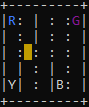

The taxi (yellow), first needs to take a step North (1) to get to the pick-up location (blue). Having said this, notice that the agent will lose 1 point, regardless if it goes North or not, as shown below.

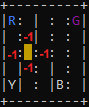

So how exactly will the agent know that going North is correct, given as to how all actions are equally punishing?

Since the agent doesn't know which action will lead it closer to the pick-up location, trial-and-error comes into play. We'll have the agent explore (perform random actions), and then see what rewards it gets.
Over several iterations, our agent observes that certain sequences of actions are more rewarding than others. To help keep track of the order of actions with higher rewards, we'll use Q-tables.



### Q-tables

A Q-table is simply a look-up table storing values representing the maximum expected future rewards our agent can expect for a certain action in a certain state (known as Q-values).
It'll tell our agent that when it runs into a certain state, that there are some actions that are much more likely to lead higher rewards. This will help the agent look up what the best action to take is.

The image below illustrates what our 'Q-table' will look like:
* Each row corresponds to a unique state in the 'Taxi' environment
* Each column corresponds to an action our agent can take
* Each cell corresponds to the Q-value for that state-action pair - a higher Q-value means a higher maximum reward our agent can expect to get if it takes that action in that state.

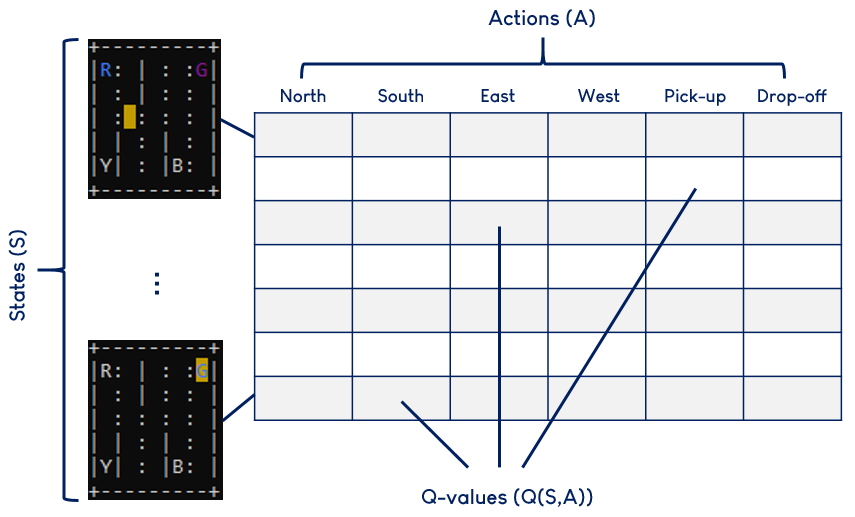

In [9]:
# Total number of states  (S): 500
state_size = env.observation_space.n

# Total number of actions (A): 6
action_size = env.action_space.n

# Form Q table to store values in: Q(S,A)
Q = np.zeros((state_size, action_size))

G = 0

learning_rate = 0.618         # alpha (learning rate) assigned randomly
discount_rate = 0.8           # gamma (discount_rate)
epsilon = 1.0
decay_rate = 0.005            # Exponential decay rate for exploration prob

# Training parameters
n_training_episodes = 1500   # Total training episodes

# Evaluation parameters
n_eval_episodes = 100        # Total number of test episodes

# Environment parameters
max_steps = 99               # Max steps per episode

# Exploration parameters
max_epsilon = 1.0             # Exploration probability at start
min_epsilon = 0.05           # Minimum exploration probability

Actual Q learning algorithm breakdown:

1. The agent starts by choosing an action with the highest Q value for the current state using argmax. Argmax will return the index/action with the highest value for that state. As shown above, we begin with a Q table filled with zeroes. After every step, the Q values (aka the cell values for that row) for state-action pairs will be updated.

2. The agent then takes action and we store the future state as state2 $(S_{t+1})$. This will allow the agent to compare the previous state $S_t$ to the new state $(S_{t+1})$.

3. We update the state-action pair $(S_t, A_t)$ for Q using the reward, and the max Q value for state2 $(S_{t+1})$. This update is done using the action value formula (based upon the Bellman equation) and allows state-action pairs to be updated in a recursive fashion (based on future values). See Figure 2 for the value iteration update.

In [10]:
def epsilon_greedy_policy(Qtable, state, epsilon):
    # Randomly generate a number between 0 and 1
    random_num = random.uniform(0,1)
    
    # if random_num > greater than epsilon --> exploitation
    if random_num > epsilon:
        # Take the action with the highest value given a state
        action = np.argmax(Qtable[state][:])
    # else --> exploration
    else:
        action = env.action_space.sample()
    
    return action

In [11]:
for episode in tqdm(range(n_training_episodes)):
    # Reduce epsilon (because we need less and less exploration)
    epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode)
    
    # Reset the environment
    state, info = env.reset()
    step = 0
    G, reward = 0,0
    done_terminated = False
    done_truncated = False

    # Repeat
    for step in range(max_steps):
        # Choose the action At using epsilon greedy policy
        action = epsilon_greedy_policy(Q, state, epsilon)
        
        # Take action At and observe Rt+1 and St+1
        # Take the action (a) and observe the outcome state(s') and reward (r)
        new_state, reward, done_terminated, done_truncated, info = env.step(action)
        
        # Update Q(s,a):= Q(s,a) + lr [R(s,a) + gamma * max Q(s',a') - Q(s,a)]
        Q[state,action] += learning_rate * (reward + discount_rate * np.max(Q[new_state]) - Q[state,action])
        
        G += reward
        
        # If terminated or truncated finish the episode
        if done_terminated or done_truncated:
            break
            
        # Update to our new state
        state = new_state
        
    if episode % max_steps == 0:
        print('Episode {} Total Reward: {}'.format(episode, G))

  0%|          | 0/1500 [00:00<?, ?it/s]

Episode 0 Total Reward: -387
Episode 99 Total Reward: -261
Episode 198 Total Reward: -189
Episode 297 Total Reward: -29
Episode 396 Total Reward: -2
Episode 495 Total Reward: 5
Episode 594 Total Reward: 8
Episode 693 Total Reward: 3
Episode 792 Total Reward: 10
Episode 891 Total Reward: 10
Episode 990 Total Reward: 6
Episode 1089 Total Reward: 11
Episode 1188 Total Reward: 10
Episode 1287 Total Reward: 7
Episode 1386 Total Reward: 0
Episode 1485 Total Reward: 10


In [12]:
state, info = env.reset()
counter = 0
reward = None
done_terminated = False
done_truncated = False

while not done_terminated or done_truncated:
    action = np.argmax(Q[state]) #1
    state, reward, done_terminated, done_truncated, info = env.step(action) #2
    counter += 1
    clear_output(wait=True)
    
    print(f"State: {counter}")
    print(env.render())
    sleep(.2)

np.set_printoptions(suppress=True, precision=3)
print("Took %d steps to win" % counter)

State: 17
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

Took 17 steps to win


------------------------------

In [ ]:
import gymnasium as gym
import numpy as np
import random

"""QLEARN CLASS NOT MY CODe"""
class QLearn:
    def __init__(self, actions, epsilon, alpha, gamma):
        self.q = {}
        self.epsilon = epsilon  # exploration constant
        self.alpha = alpha      # discount constant
        self.gamma = gamma      # discount factor
        self.actions = actions

    def load_q(self, new_q):
        self.q = new_q

    def getQ(self, state, action):
        return self.q.get(str(state)+ action, 0.0)

    def learnQ(self, state, action, reward, value):
        '''
        Q-learning:
            Q(s, a) += alpha * (reward(s,a) + max(Q(s') - Q(s,a))
        '''
        oldv = self.q.get(str(state) + action, None)
        if oldv is None:
            self.q[str(state)+ action] = reward
        else:
            self.q[str(state)+ action] = oldv + self.alpha * (value - oldv)

    def chooseAction(self, state, return_q=False):
        q = [self.getQ(state, a) for a in self.actions]
        maxQ = max(q)

        if random.random() < self.epsilon:
            minQ = min(q); mag = max(abs(minQ), abs(maxQ))
            # add random values to all the actions, recalculate maxQ
            q = [q[i] + random.random() * mag - .5 * mag for i in range(len(self.actions))]
            maxQ = max(q)

        count = q.count(maxQ)
        # In case there're several state-action max values
        # we select a random one among them
        if count > 1:
            best = [i for i in range(len(self.actions)) if q[i] == maxQ]
            i = random.choice(best)
        else:
            i = q.index(maxQ)

        action = self.actions[i]
        if return_q: # if they want it, give it!
            return action, q
        return action

    def learn(self, state1, action1, reward, state2):
        maxqnew = max([self.getQ(state2, a) for a in self.actions])
        self.learnQ(state1, action1, reward, reward + self.gamma*maxqnew)

EPSILON=.5
ALPHA=.4
GAMMA=1

env = gym.make("CarRacing-v2", render_mode="human")
env.reset()

action_list = [
    "steer_left",
    "steer_right",
    "gas_on",
    "gas_off",
    "brake_on",
    "brake_off"
]

def assign_val(x, index, val):
    x[index] = val
    return x

action_effects = {
    "steer_left":     lambda x: assign_val(x, 0, -1),
    "steer_straight": lambda x: assign_val(x, 0, 0),
    "steer_right":    lambda x: assign_val(x, 0, 1),
    "gas_on":         lambda x: assign_val(x, 1, 1),
    "gas_off":        lambda x: assign_val(x, 1, 0),
    "brake_on":       lambda x: assign_val(x, 2, 1),
    "brake_off":      lambda x: assign_val(x, 2, 0)
}

agent = QLearn(
    actions=action_list,
    epsilon=EPSILON,
    alpha=ALPHA,
    gamma=GAMMA
)

max_reading = 0

import math
import numpy as np
def convert_to_discrete(reading, max_reading):
    if isinstance(reading, np.ndarray):
        return np.floor_divide(reading, max_reading / 5).astype(int)
    if reading == 0 or reading == -1:
        return -1
    return math.floor(reading/max_reading * 5)

for iteration in range(100):
    action = np.array([0, 0, 0])
    action_chosen = None
    state = None
    step_reward = None
    done_terminated = False
    done_truncated = False
    
    while not done_terminated or not done_truncated:
        new_state, step_reward, done_terminated, done_truncated, _ = env.step(action)
        
        for reading in new_state:
            #if reading > max_reading:
            if np.any(reading > max_reading):
                max_reading = np.max(reading)
                
        #new_state = list(map(lambda x: convert_to_discrete(x, max_reading), new_state))
        new_state = [convert_to_discrete(x, max_reading) for x in new_state]
        
        if state:
            agent.learn(state, action_chosen, step_reward, new_state)

        action_chosen = agent.chooseAction(new_state)
        action = action_effects[action_chosen](action)
        state = new_state
        
        if iteration % 10 == 0:
            env.render()
    env.reset()

import json
with open("./agent_q.agent", "w+") as f:
    f.write(json.dumps(agent.q))